In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cv2 as cv
import os

from mytest.k_domino import tile_types_str

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree

In [3]:
df = pd.read_csv('mean_hsv_full.csv')
# df = df.drop('Tile', axis=1)

df

,n_img,n_row,n_col,tile_type,h,s,v
0,0,4,4,0,26.3026,245.1842,191.1801
1,0,0,0,1,41.5906,193.0161,151.1209
2,0,1,0,1,43.3704,202.0811,151.0329
3,0,1,4,1,40.9778,210.9260,144.1913
4,0,2,0,1,40.8554,199.6978,151.0532
...,...,...,...,...,...,...,...
1845,73,4,1,4,82.0147,223.2719,142.1778
1846,73,4,2,4,95.9824,235.2779,144.5809
1847,73,4,3,4,78.7413,221.0898,141.0015
1848,73,4,4,4,81.9820,208.7510,133.7894


In [4]:
df = df.drop(['n_img', 'n_row', 'n_col'], axis=1)
df = df.rename(columns={'h': 'hue', 's': 'saturation', 'v': 'value'})

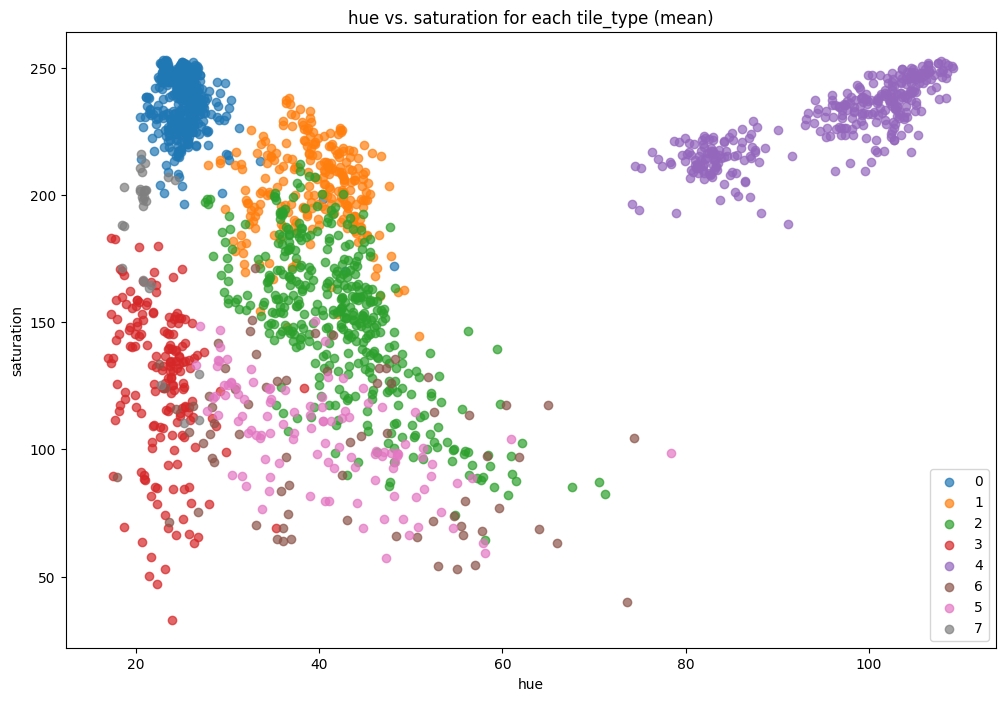

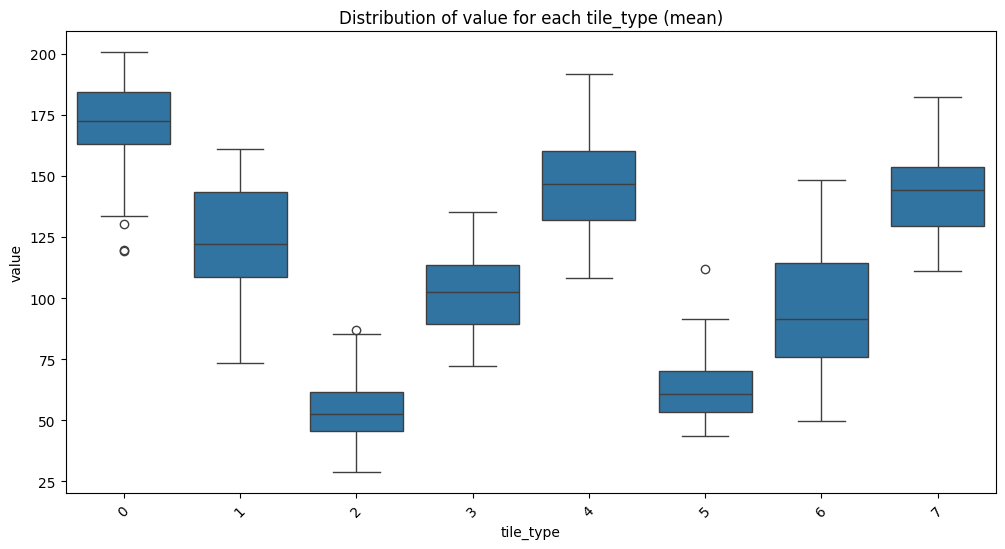

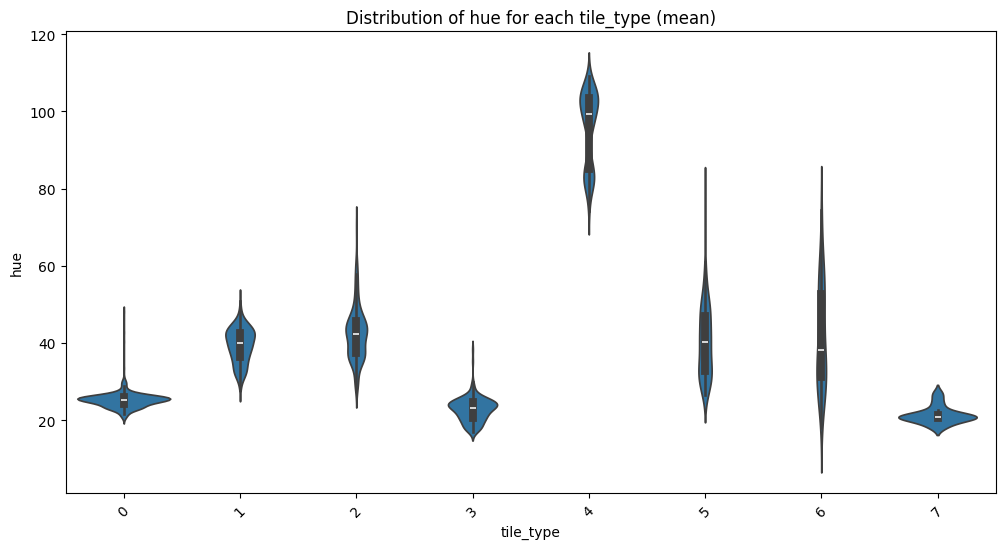

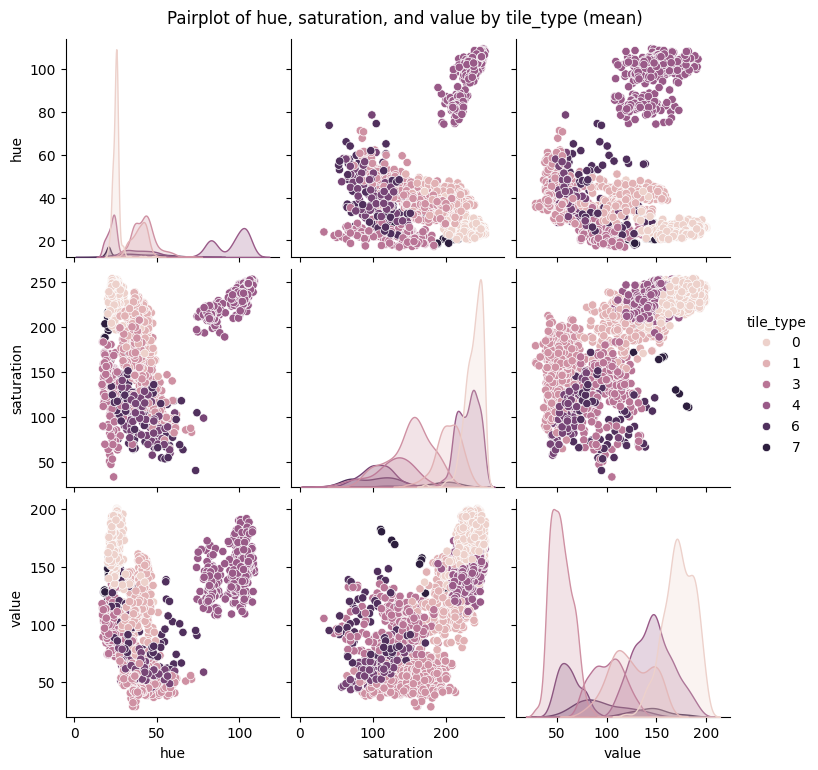

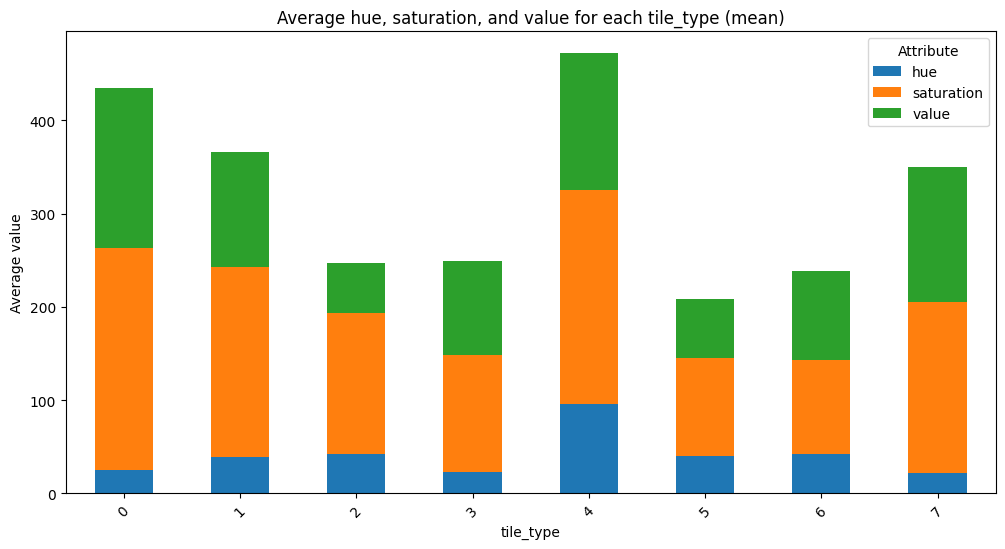

In [5]:
# 1. Scatter plot of hue vs. saturation for each tile_type
plt.figure(figsize=(12, 8))
for type in df['tile_type'].unique():
    subset = df[df['tile_type'] == type]
    plt.scatter(subset['hue'], subset['saturation'], label=type, alpha=0.7)
plt.xlabel('hue')
plt.ylabel('saturation')
plt.title('hue vs. saturation for each tile_type (mean)')
plt.legend()
plt.show()

# 2. Box plot of value for each tile_type
plt.figure(figsize=(12, 6))
sns.boxplot(x='tile_type', y='value', data=df)
plt.title('Distribution of value for each tile_type (mean)')
plt.xticks(rotation=45)
plt.show()

# 3. Violin plot of hue for each tile_type
plt.figure(figsize=(12, 6))
sns.violinplot(x='tile_type', y='hue', data=df)
plt.title('Distribution of hue for each tile_type (mean)')
plt.xticks(rotation=45)
plt.show()

# 4. Pairplot for all numerical variables, colored by tile_type
sns.pairplot(df, hue='tile_type', vars=['hue', 'saturation', 'value'])
plt.suptitle('Pairplot of hue, saturation, and value by tile_type (mean)', y=1.02)
plt.show()

# 5. Stacked bar chart of average hue, saturation, and value for each tile_type
avg_data = df.groupby('tile_type')[['hue', 'saturation', 'value']].mean()
avg_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average hue, saturation, and value for each tile_type (mean)')
plt.xlabel('tile_type')
plt.ylabel('Average value')
plt.legend(title='Attribute')
plt.xticks(rotation=45)
plt.show()

In [6]:
X = df.drop('tile_type', axis=1)
y = df['tile_type'].astype('category')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
k = 22
knn = KNeighborsClassifier(k)

In [9]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=22)

In [10]:
y_pred = knn.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
print(report)
pd.DataFrame(report).transpose()

{'0': {'precision': 0.9918032786885246, 'recall': 1.0, 'f1-score': 0.9958847736625515, 'support': 121.0}, '1': {'precision': 0.9523809523809523, 'recall': 0.9836065573770492, 'f1-score': 0.967741935483871, 'support': 61.0}, '2': {'precision': 0.9454545454545454, 'recall': 0.9629629629629629, 'f1-score': 0.9541284403669725, 'support': 108.0}, '3': {'precision': 0.7222222222222222, 'recall': 0.9069767441860465, 'f1-score': 0.8041237113402062, 'support': 43.0}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 84.0}, '5': {'precision': 0.8421052631578947, 'recall': 0.6153846153846154, 'f1-score': 0.7111111111111111, 'support': 26.0}, '6': {'precision': 0.4444444444444444, 'recall': 0.26666666666666666, 'f1-score': 0.3333333333333333, 'support': 15.0}, '7': {'precision': 1.0, 'recall': 0.4, 'f1-score': 0.5714285714285714, 'support': 5.0}, 'accuracy': 0.9287257019438445, 'macro avg': {'precision': 0.8623013382935729, 'recall': 0.7669496933221676, 'f1-score': 0.7922189845908

,precision,recall,f1-score,support
0,0.991803,1.000000,0.995885,121.000000
1,0.952381,0.983607,0.967742,61.000000
2,0.945455,0.962963,0.954128,108.000000
3,0.722222,0.906977,0.804124,43.000000
4,1.000000,1.000000,1.000000,84.000000
5,0.842105,0.615385,0.711111,26.000000
6,0.444444,0.266667,0.333333,15.000000
7,1.000000,0.400000,0.571429,5.000000
accuracy,0.928726,0.928726,0.928726,0.928726
macro avg,0.862301,0.766950,0.792219,463.000000


In [11]:
gbc = GradientBoostingClassifier()

In [12]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [13]:
y_pred = gbc.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,121.000000
1,0.953125,1.000000,0.976000,61.000000
2,0.945455,0.962963,0.954128,108.000000
3,0.851064,0.930233,0.888889,43.000000
4,1.000000,1.000000,1.000000,84.000000
5,0.812500,0.500000,0.619048,26.000000
6,0.411765,0.466667,0.437500,15.000000
7,1.000000,0.800000,0.888889,5.000000
accuracy,0.937365,0.937365,0.937365,0.937365
macro avg,0.871739,0.832483,0.845557,463.000000


In [23]:
described = {}
unique_tile_tyles = df['tile_type'].unique()
for tile_type in unique_tile_tyles:
    described[tile_type] = df[df['tile_type'] == tile_type].describe(percentiles=[0.005, 0.5, 0.995]).to_dict()

def get_terrain(hue, saturation, value):
    # df_tile = pd.DataFrame({ 'hue': hue, 'saturation': saturation, 'value': value })

    # return gbc.predict(df_tile)

    for tile_type in unique_tile_tyles:
        described_tile = described[tile_type]

        if described_tile['hue']['0.5%'] < hue < described_tile['hue']['99.5%'] and described_tile['saturation']['0.5%'] < saturation < described_tile['saturation']['99.5%'] and described_tile['value']['0.5%'] < value < described_tile['value']['99.5%']:
            return tile_type
        
    return -1

In [24]:
def predict(X):
    pred = np.zeros(len(X))


    for i in range(len(X)):
        pred[i] = get_terrain(*X.iloc[i])

    return pred

In [25]:
y_pred = predict(X_test)
y_pred

array([ 2.,  3.,  3.,  6.,  2.,  1.,  2.,  0.,  0.,  1.,  0.,  2.,  3.,
        2.,  0.,  0.,  2.,  0.,  1.,  2.,  0.,  0.,  2.,  1.,  0.,  6.,
        1.,  3.,  3.,  2.,  3.,  2.,  0.,  3.,  0.,  0.,  2.,  4.,  3.,
        0.,  0.,  2.,  1.,  0.,  2.,  4.,  1.,  4.,  0.,  2.,  1.,  2.,
        2.,  0.,  1.,  1.,  2., -1.,  0.,  2.,  4.,  1.,  3.,  2.,  4.,
        2.,  1.,  0.,  0.,  0.,  4.,  2.,  2.,  2.,  0.,  1.,  4.,  5.,
        2.,  1.,  3.,  4.,  2.,  2.,  0., -1.,  2.,  0.,  0.,  2.,  0.,
        2., -1.,  2.,  0.,  1.,  0.,  0.,  1.,  7.,  0.,  0.,  4.,  2.,
        4.,  3.,  3.,  2.,  2.,  0.,  3.,  0.,  2.,  2.,  4.,  2.,  3.,
        4.,  1.,  3.,  3.,  0.,  1.,  0.,  4.,  0.,  4.,  6.,  0.,  4.,
        1.,  0.,  2.,  0.,  2.,  0.,  1.,  2.,  0.,  4.,  4.,  2.,  2.,
        4.,  2.,  1.,  0.,  1.,  2.,  1.,  0.,  2.,  0.,  1.,  0.,  4.,
        0.,  2.,  0.,  0.,  0.,  2.,  2.,  2.,  2.,  2.,  2.,  4.,  0.,
        0.,  0.,  1.,  4.,  2.,  1.,  3.,  0.,  3.,  3.,  0.,  2

In [26]:
report = classification_report(y_test, y_pred, output_dict=True)

pd.DataFrame(report).transpose()

/home/baldo/uni/daki_p0/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/baldo/uni/daki_p0/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/baldo/uni/daki_p0/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
-1.0,0.000000,0.000000,0.000000,0.000000
0.0,0.984252,0.976562,0.980392,128.000000
1.0,0.929825,0.963636,0.946429,55.000000
2.0,0.853846,0.940678,0.895161,118.000000
3.0,0.809524,0.918919,0.860759,37.000000
4.0,1.000000,0.975000,0.987342,80.000000
5.0,0.800000,0.200000,0.320000,20.000000
6.0,0.750000,0.473684,0.580645,19.000000
7.0,1.000000,0.500000,0.666667,6.000000
accuracy,0.900648,0.900648,0.900648,0.900648


In [28]:
tile_classes = df['tile_type'].unique()
confusion_matrix = np.zeros((len(tile_classes), len(tile_classes)))

for i in range(len(tile_classes)):
    for j in range(len(tile_classes)):
        confusion_matrix[j, i] = np.sum(y_pred[y_test == i] == j)

# pd.DataFrame(confusion_matrix)
sum(y_test == 6)

19

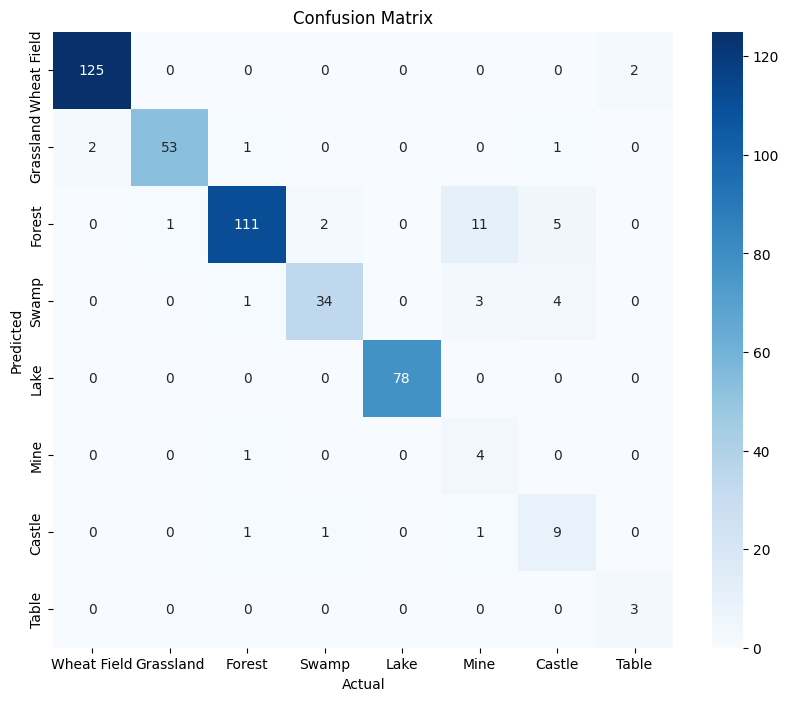

In [29]:
# Create a figure and axis
plt.figure(figsize=(10, 8))

tile_classes_str = [
    "Wheat Field",
    "Grassland",
    "Forest",
    "Swamp",
    "Lake",
    "Mine",
    "Castle",
    "Table",
]

# Create the heatmap using Seaborn
sns.heatmap(confusion_matrix.astype(np.int16), annot=True, fmt='d', cmap='Blues', 
            xticklabels=tile_classes_str,  # Replace with your class labels
            yticklabels=tile_classes_str)  # Replace with your class labels

# Set labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [30]:
print(f'med i cm: {confusion_matrix.sum()}')
print(f'ikke med i cm: {len(y_pred) - confusion_matrix.sum()}')

print(f'andel ikke med i cm: {(len(y_pred) - confusion_matrix.sum()) / len(y_pred):0.01%}')


med i cm: 454.0
ikke med i cm: 9.0
andel ikke med i cm: 1.9%
